## <div style="text-align: center">Exploratory Data Analysis Pipeline </div>

<div style="text-align: center">If you've followed my other kernels so far. You have noticed that for those who are <b>beginners</b>, I've introduced a course "<b><a ref='https://www.kaggle.com/mjbahmani/10-steps-to-become-a-data-scientist'>10 Steps to Become a Data Scientist</a></b>." In this kernel we will start another step with each other. There are plenty of <b>Kernels</b> that can help you learn <b>EDA</b> from scratch but here in <b>Kaggle</b>, I want to Analysis <font color="green"><b>Meta Kaggle</b></font> and <font color="green"><b>Kaggle Survey 2018</b></font>,   popular  Datasets as a comprehensive pipeline for <b>EDA</b>. 
After reading, you can use it  to Analysis other real dataset and use it as a template to deal with <b>EDA</b> problems.</div>
<img src='http://s9.picofile.com/file/8343417468/eda11.png' height=400 width=400>
<div style="text-align:center">last update: <b>11/23/2018</b></div>



>###### You may  be interested have a look at it: [**10-Steps-to-Become-a-Data-Scientist**](https://github.com/mjbahmani/10-steps-to-become-a-data-scientist)


---------------------------------------------------------------------
You can Fork and Run this kernel on Github:
> ###### [ GitHub](https://github.com/mjbahmani/10-steps-to-become-a-data-scientist)

-------------------------------------------------------------------------------------------------------------
 **I hope you find this kernel helpful and some <font color="red"><b>UPVOTES</b></font> would be very much appreciated**
 
 -----------

 <a id="top"></a> <br>
## Notebook  Content
1. [Introduction](#1)
1. [Loading Packages](#2)
    1. [version](#3)
    1. [Setup](#4)
1. [Exploratory data analysis](#5)
1. [Data Collection](#6)
    1. [Features](#7)
    1. [Explorer Dataset](#8)
1. [Data Cleaning](#9)
    1. [Find yourself in Users datset](#10)
    1. [Find your kernels in Kernels dataset](#11)
1. [Data Preprocessing](#12)
1. [Data Visaulization](#13)
    1. [Scatter plot](#14)
    1. [Box plot](#15)
    1. [Histogram](#16)
    1. [violinplots](#17)
    1. [kdeplot](#18)
    1. [jointplot](#19)
    1. [andrews_curves](#20)
    1. [Heatmap](#21)
    1. [WordCloud](#22)
1. [Conclusion](#23)    
1. [References](#24)    
    

 <a id="1"></a> <br>
## 1- Introduction
This is a **comprehensive EDA techniques with python** , that I have spent a lot of time to complete it.

it is clear that everyone in this community is familiar with Meta Kaggle and kaggle survey 2018 datasets but if you need to review your information about the datasets please visit  [meta-kaggle](https://www.kaggle.com/kaggle/meta-kaggle) and [kaggle survey 2018](https://www.kaggle.com/kaggle/kaggle-survey-2018).

I am open to getting your feedback for improving this **kernel** together.


<a id="2"></a> <br>
## 2- Loading Packages
In this kernel we are using the following packages:

 <img src="http://s8.picofile.com/file/8338227868/packages.png">
 Now we import all of them 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud as wc
from nltk.corpus import stopwords
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import string
import scipy
import numpy
import nltk
import json
import sys
import csv
import os

<a id="3"></a> <br>
## 2-1 version

In [2]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))
#print('wordcloud: {}'.format(wordcloud.version))

matplotlib: 2.2.3
sklearn: 0.20.0
scipy: 1.1.0
seaborn: 0.9.0
pandas: 0.23.4
numpy: 1.15.4
Python: 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]


<a id="4"></a> <br>
## 2-2 Setup

A few tiny adjustments for better **code readability**

In [3]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

<a id="5"></a> <br>
## 3- Exploratory Data Analysis(EDA)
 In this section, you'll learn how to use graphical and numerical techniques to begin uncovering the structure of your data. 
 
* Which variables suggest interesting relationships?
* Which observations are unusual?

By the end of the section, you'll be able to answer these questions and more, while generating graphics that are both insightful and beautiful.  then We will review analytical and statistical operations:

1. Data Collection
1. Visualization
1. Data Cleaning
1. Data Preprocessing

<img src="http://s9.picofile.com/file/8338476134/EDA.png">

###### [Go to top](#top)

<a id="6"></a> <br>
## 3-1 Data Collection
**Data collection** is the process of gathering and measuring data, information or any variables of interest in a standardized and established manner that enables the collector to answer or test hypothesis and evaluate outcomes of the particular collection.[techopedia]
<img src='https://www.iaeemwc.com/assets/images/Blog/data-collection.jpg' height=300 width=300>

I start Collection Data by the Users and Kernels datasets into **Pandas DataFrames**

In [4]:
# import kernels and users to play with it
users = pd.read_csv("../input/meta-kaggle/Users.csv")
kernels = pd.read_csv("../input/meta-kaggle/Kernels.csv")
messages = pd.read_csv("../input/meta-kaggle/ForumMessages.csv")
freeFormResponses=pd.read_csv("../input/kaggle-survey-2018/freeFormResponses.csv")
multipleChoiceResponses=pd.read_csv("../input/kaggle-survey-2018/multipleChoiceResponses.csv")

**<< Note 1 >>**

* Each row is an observation (also known as : sample, example, instance, record)
* Each column is a feature (also known as: Predictor, attribute, Independent Variable, input, regressor, Covariate)
###### [Go to top](#top)

In [5]:
users.sample(1) 

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
1778238,1941641,kroszczyna,Kacper Roszczyna,5/25/2018,0


In [6]:
kernels.sample(1) 

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes
69460,121869,776114,463981.0,461796.0,NaN,463981.0,11/24/2016 12:17:12 AM,11/24/2016,11/24/2016,False,start-from-data-cleaning-to-machine-learning,NaN,NaN,0,0,0


In [7]:
freeFormResponses.sample(1) 

,Q11_OTHER_TEXT,Q12_OTHER_TEXT,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q15_OTHER_TEXT,Q16_OTHER_TEXT,Q17_OTHER_TEXT,Q18_OTHER_TEXT,Q19_OTHER_TEXT,Q1_OTHER_TEXT,Q20_OTHER_TEXT,Q21_OTHER_TEXT,Q22_OTHER_TEXT,Q27_OTHER_TEXT,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q35_OTHER_TEXT,Q36_OTHER_TEXT,Q37_OTHER_TEXT,Q38_OTHER_TEXT,Q42_OTHER_TEXT,Q49_OTHER_TEXT,Q50_OTHER_TEXT,Q6_OTHER_TEXT,Q7_OTHER_TEXT
17628,NaN,NaN,NaN,NaN,NaN,"R, Python, Jupyter",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
multipleChoiceResponses.sample(1) 

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,...,Q46,Q47_Part_1,Q47_Part_2,Q47_Part_3,Q47_Part_4,Q47_Part_5,Q47_Part_6,Q47_Part_7,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q47_Part_16,Q48,Q49_Part_1,Q49_Part_2,Q49_Part_3,Q49_Part_4,Q49_Part_5,Q49_Part_6,Q49_Part_7,Q49_Part_8,Q49_Part_9,Q49_Part_10,Q49_Part_11,Q49_Part_12,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
7066,551,Male,-1,30-34,United States of America,Bachelor’s degree,Engineering (non-computer focused),Business Analyst,-1,Energy/Mining,-1,10-15,"90-100,000",No (we do not use ML methods),Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,-1,"Basic statistical software (Microsoft Excel, G...",457,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


### Please **replace** your username and find your userid

we suppose that userid==authoruserid and use userid for both kernels and users dataset

In [9]:
username="mjbahmani"
userid=int(users[users['UserName']=="mjbahmani"].Id)
userid

1840354

<a id="7"></a> <br>
## 3-1-1 Features
Features can be from following types:
1. numeric
1. categorical
1. ordinal
1. datetime
1. coordinates

Find the type of features in **Meta Kaggle**?!
<br>
for getting some information about the dataset you can use **info()** command
###### [Go to top](#top)

In [10]:
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337830 entries, 0 to 2337829
Data columns (total 5 columns):
Id                 int64
UserName           object
DisplayName        object
RegisterDate       object
PerformanceTier    int64
dtypes: int64(2), object(3)
memory usage: 89.2+ MB
None


In [11]:
print(freeFormResponses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 35 columns):
Q11_OTHER_TEXT     545 non-null object
Q12_OTHER_TEXT     1765 non-null object
Q12_Part_1_TEXT    3928 non-null object
Q12_Part_2_TEXT    1448 non-null object
Q12_Part_3_TEXT    1134 non-null object
Q12_Part_4_TEXT    9553 non-null object
Q12_Part_5_TEXT    1353 non-null object
Q13_OTHER_TEXT     1193 non-null object
Q14_OTHER_TEXT     502 non-null object
Q15_OTHER_TEXT     588 non-null object
Q16_OTHER_TEXT     597 non-null object
Q17_OTHER_TEXT     114 non-null object
Q18_OTHER_TEXT     162 non-null object
Q19_OTHER_TEXT     451 non-null object
Q1_OTHER_TEXT      80 non-null object
Q20_OTHER_TEXT     94 non-null object
Q21_OTHER_TEXT     493 non-null object
Q22_OTHER_TEXT     95 non-null object
Q27_OTHER_TEXT     308 non-null object
Q28_OTHER_TEXT     187 non-null object
Q29_OTHER_TEXT     532 non-null object
Q30_OTHER_TEXT     203 non-null object
Q31_OTHER_TEXT     235 non-nu

<a id="8"></a> <br>
## 3-1-2 Explorer Dataset
1- Dimensions of the dataset.

2- Peek at the data itself.

3- Statistical summary of all attributes.

4- Breakdown of the data by the class variable.

Don’t worry, each look at the data is **one command**. These are useful commands that you can use again and again on future projects.
###### [Go to top](#top)

In [12]:
# shape
print(users.shape)

(2337830, 5)


In [13]:
# shape
print(kernels.shape)

(207534, 16)


In [14]:
print(freeFormResponses.shape)

(23860, 35)


In [15]:
#columns*rows
users.size

11689150

In [16]:
#columns*rows
kernels.size

3320544


We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

for getting some information about the dataset you can use **info()** command

In [17]:
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337830 entries, 0 to 2337829
Data columns (total 5 columns):
Id                 int64
UserName           object
DisplayName        object
RegisterDate       object
PerformanceTier    int64
dtypes: int64(2), object(3)
memory usage: 89.2+ MB
None


In [18]:
print(kernels.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207534 entries, 0 to 207533
Data columns (total 16 columns):
Id                           207534 non-null int64
AuthorUserId                 207534 non-null int64
CurrentKernelVersionId       170722 non-null float64
ForkParentKernelVersionId    65012 non-null float64
ForumTopicId                 16486 non-null float64
FirstKernelVersionId         206096 non-null float64
CreationDate                 207342 non-null object
EvaluationDate               173728 non-null object
MadePublicDate               199569 non-null object
IsProjectLanguageTemplate    207534 non-null bool
CurrentUrlSlug               207532 non-null object
Medal                        7744 non-null float64
MedalAwardDate               7744 non-null object
TotalViews                   207534 non-null int64
TotalComments                207534 non-null int64
TotalVotes                   207534 non-null int64
dtypes: bool(1), float64(5), int64(5), object(5)
memory usage: 23

you see number of unique item for Species with command below:

In [19]:
kernels['Medal'].unique()

array([nan,  3.,  2.,  1.])

In [20]:
kernels["Medal"].value_counts()


3.0    5714
2.0    1412
1.0     618
Name: Medal, dtype: int64

to check the first 5 rows of the data set, we can use head(5).

In [21]:
kernels.head(5) 

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes
0,1,2505,205.0,NaN,NaN,1.0,3/25/2015 6:25:32 PM,3/23/2018,3/25/2015,False,hello,NaN,NaN,25,0,0
1,2,3716,1748.0,NaN,26670.0,2.0,3/25/2015 6:31:07 PM,4/16/2015,3/25/2015,False,rf-proximity,3.0,7/15/2016,7566,1,12
2,4,3716,41.0,NaN,NaN,9.0,3/25/2015 9:57:36 PM,3/23/2018,3/25/2015,False,r-version,NaN,NaN,9,0,0
3,5,28963,19.0,NaN,NaN,13.0,3/25/2015 10:01:04 PM,3/23/2018,3/25/2015,False,test1,NaN,NaN,9,0,0
4,6,3716,21.0,NaN,NaN,15.0,3/25/2015 10:19:00 PM,3/23/2018,3/25/2015,False,are-icons-missing,NaN,NaN,7,0,0


to check out last 5 row of the data set, we use tail() function

In [22]:
users.tail() 

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
2337825,2530908,leoschmi,Leo_,11/23/2018,0
2337826,2530909,habibgouni,HabibGouni,11/23/2018,0
2337827,2530910,parvpatodi,Parv,11/23/2018,0
2337828,2530911,jweej1,jooj,11/23/2018,0
2337829,2530912,mohammedalmaghrabi,Mohammed A,11/23/2018,0


to pop up 5 random rows from the data set, we can use **sample(5)**  function

In [23]:
kernels.sample(5) 

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes
185195,1468707,1560448,5289492.0,NaN,NaN,5160734.0,8/17/2018 5:45:03 PM,8/24/2018,8/24/2018,False,titanic-predicted,NaN,NaN,86,0,0
99237,168175,534830,NaN,757266.0,NaN,757669.0,1/24/2017 10:45:49 PM,NaN,1/24/2017,False,simple-stacking-with-xgboost-0-808,NaN,NaN,20,0,0
19128,24726,455496,NaN,NaN,NaN,106834.0,11/18/2015 3:49:04 PM,NaN,11/18/2015,False,notebook-c6ee635f99c520224b66,NaN,NaN,9,0,0
131781,237289,1007226,1090192.0,NaN,NaN,1090185.0,4/18/2017 10:06:01 AM,4/18/2017,4/18/2017,False,notebookd6949c34de,NaN,NaN,14,0,0
104635,202131,825608,981950.0,NaN,NaN,981950.0,3/5/2017 7:20:34 AM,3/5/2017,3/5/2017,False,notebook01987f14df,NaN,NaN,20,0,0


to give a statistical summary about the dataset, we can use **describe()

In [24]:
kernels.describe() 

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,Medal,TotalViews,TotalComments,TotalVotes
count,2.075340e+05,2.075340e+05,1.707220e+05,6.501200e+04,16486.000000,2.060960e+05,7744.000000,207534.000000,207534.000000,207534.000000
mean,4.492258e+05,8.141562e+05,1.979049e+06,1.429974e+06,44925.038942,1.664119e+06,2.658058,306.539222,0.557831,1.888881
std,5.638257e+05,5.619333e+05,2.056020e+06,1.626584e+06,16311.737987,1.940696e+06,0.620222,3056.229062,6.138670,22.395555
min,1.000000e+00,3.680000e+02,1.900000e+01,1.000000e+00,14433.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,9.052550e+04,4.180550e+05,4.742330e+05,3.075340e+05,30579.000000,3.353328e+05,2.000000,13.000000,0.000000,0.000000
50%,1.926580e+05,6.958150e+05,1.073884e+06,6.654450e+05,44999.500000,9.106650e+05,3.000000,23.000000,0.000000,0.000000
75%,5.617760e+05,1.025796e+06,2.944494e+06,2.466491e+06,59128.500000,2.139974e+06,3.000000,88.000000,0.000000,0.000000
max,2.179960e+06,2.529130e+06,7.678865e+06,7.670494e+06,72447.000000,7.678865e+06,3.000000,531866.000000,901.000000,3037.000000


<a id="9"></a> <br>
## 3-2 Data Cleaning
When dealing with real-world data, dirty data is the norm rather than the exception. We continuously need to predict correct values, impute missing ones, and find links between various data artefacts such as schemas and records. We need to stop treating data cleaning as a piecemeal exercise (resolving different types of errors in isolation), and instead leverage all signals and resources (such as constraints, available statistics, and dictionaries) to accurately predict corrective actions.

<img src='http://www.datacleansing.net.au/Images/Site/DG_Data_Cleansing_Cycle_300px.png' width=300 height=300>

The primary goal of data cleaning is to detect and remove errors and **anomalies** to increase the value of data in analytics and decision making. While it has been the focus of many researchers for several years, individual problems have been addressed separately. These include missing value imputation, outliers detection, transformations, integrity constraints violations detection and repair, consistent query answering, deduplication, and many other related problems such as profiling and constraints mining.[4]
###### [Go to top](#top)

How many NA elements in every column!!
Good news, it is Zero!
to check out how many null info are on the dataset, we can use **isnull().sum()**

In [25]:
#How many NA elements in every column
users.isnull().sum()

Id                   0
UserName             1
DisplayName        102
RegisterDate         0
PerformanceTier      0
dtype: int64

In [26]:
kernels.isnull().sum()

Id                                0
AuthorUserId                      0
CurrentKernelVersionId        36812
ForkParentKernelVersionId    142522
ForumTopicId                 191048
FirstKernelVersionId           1438
CreationDate                    192
EvaluationDate                33806
MadePublicDate                 7965
IsProjectLanguageTemplate         0
CurrentUrlSlug                    2
Medal                        199790
MedalAwardDate               199790
TotalViews                        0
TotalComments                     0
TotalVotes                        0
dtype: int64

In [27]:
kernels.groupby('Medal').count()

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,MedalAwardDate,TotalViews,TotalComments,TotalVotes
Medal,,,,,,,,,,,,,,,
1.0,618,618,618,56,617,618,618,618,617,618,618,618,618,618,618
2.0,1412,1412,1412,162,1390,1411,1412,1412,1412,1412,1412,1412,1412,1412,1412
3.0,5714,5714,5711,682,4670,5714,5714,5712,5712,5714,5714,5714,5714,5714,5714


to print dataset **columns**, we can use columns atribute

In [28]:
kernels.columns

Index(['Id', 'AuthorUserId', 'CurrentKernelVersionId',
       'ForkParentKernelVersionId', 'ForumTopicId', 'FirstKernelVersionId',
       'CreationDate', 'EvaluationDate', 'MadePublicDate',
       'IsProjectLanguageTemplate', 'CurrentUrlSlug', 'Medal',
       'MedalAwardDate', 'TotalViews', 'TotalComments', 'TotalVotes'],
      dtype='object')

In [29]:
users.columns

Index(['Id', 'UserName', 'DisplayName', 'RegisterDate', 'PerformanceTier'], dtype='object')

**<< Note 2 >>**
in pandas's data frame you can perform some query such as "where"

 <a id="10"></a> <br>
## 3-2-1 Find yourself in Users datset

In [30]:
users[users['Id']==userid]

,Id,UserName,DisplayName,RegisterDate,PerformanceTier
1682206,1840354,mjbahmani,MJ Bahmani,4/20/2018,2


 <a id="11"></a> <br>
## 3-2-2 Find your kernels in Kernels dataset

In [31]:
yourkernels=kernels[kernels['AuthorUserId']==userid]
yourkernels

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes
190395,1594170,1840354,7342050.0,NaN,66867.0,5559571.0,9/7/2018 7:43:29 AM,11/13/2018,9/25/2018,False,a-comprehensive-ml-workflow-with-python,1.0,10/13/2018,13510,111,351
194813,1778622,1840354,7581252.0,NaN,68065.0,6312298.0,10/2/2018 1:20:23 PM,11/20/2018,10/9/2018,False,10-steps-to-become-a-data-scientist,1.0,11/15/2018,8752,85,203
195366,1791166,1840354,6847029.0,6153549.0,67864.0,6248131.0,10/4/2018 3:10:02 AM,10/27/2018,10/6/2018,False,machine-learning-workflow-for-house-prices,2.0,10/26/2018,5519,49,95
197589,1847773,1840354,7288913.0,NaN,68412.0,6412791.0,10/11/2018 9:26:49 AM,11/11/2018,10/12/2018,False,top-5-deep-learning-frameworks-tutorial,2.0,11/12/2018,3791,35,75
197693,1808203,1840354,7584776.0,NaN,67862.0,6247406.0,10/6/2018 12:31:03 PM,11/20/2018,10/6/2018,False,linear-algebra-for-data-scientists,1.0,11/21/2018,8490,25,170
198655,1875944,1840354,7636130.0,NaN,68625.0,6496124.0,10/15/2018 9:48:31 AM,11/23/2018,10/15/2018,False,the-data-scientist-s-toolbox-tutorial-2,2.0,11/22/2018,2100,16,63
200844,1903816,1840354,7072880.0,NaN,69114.0,6605349.0,10/18/2018 9:48:53 PM,11/4/2018,10/19/2018,False,20-ml-algorithms-from-start-to-finish,2.0,11/5/2018,3439,33,90
201238,1919205,1840354,7672737.0,NaN,69251.0,6678798.0,10/21/2018 10:18:38 AM,11/23/2018,10/21/2018,False,exploratory-data-analysis-pipeline,3.0,11/19/2018,211,3,11
201644,1890271,1840354,7547420.0,NaN,68827.0,6552283.0,10/17/2018 6:15:22 AM,11/19/2018,10/17/2018,False,the-data-scientist-s-toolbox-tutorial-1,1.0,11/15/2018,13204,73,296
203234,2000640,1840354,7072438.0,NaN,70330.0,6998053.0,11/1/2018 8:05:02 AM,11/4/2018,11/1/2018,False,tutorial-on-ensemble-learning,NaN,NaN,449,7,7


<a id="12"></a> <br>
## 3-4 Data Preprocessing
**Data preprocessing** refers to the transformations applied to our data before feeding it to the algorithm.
 
Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.
there are plenty of steps for data preprocessing and we just listed some of them in general(Not just for Quora) :
* removing Target column (id)
* Sampling (without replacement)
* Making part of iris unbalanced and balancing (with undersampling and SMOTE)
* Introducing missing values and treating them (replacing by average values)
* Noise filtering
* Data discretization
* Normalization and standardization
* PCA analysis
* Feature selection (filter, embedded, wrapper)
###### [Go to top](#top)

**<< Note >>**
>**Preprocessing and generation pipelines depend on a model type**

<a id="13"></a> <br>
## 3-4 Visualization
**Data visualization**  is the presentation of data in a pictorial or graphical format. It enables decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns.

With interactive visualization, you can take the concept a step further by using technology to drill down into charts and graphs for more detail, interactively changing what data you see and how it’s processed.[SAS]

 In this section I show you  **11 plots** with **matplotlib** and **seaborn** that is listed in the blew picture:
 <img src="http://s8.picofile.com/file/8338475500/visualization.jpg" />


<a id="14"></a> <br>
## 3-4-1  Scatter plot

Scatter plot Purpose To identify the type of relationship (if any) between two quantitative variables




In [32]:
yourkernels.columns

Index(['Id', 'AuthorUserId', 'CurrentKernelVersionId',
       'ForkParentKernelVersionId', 'ForumTopicId', 'FirstKernelVersionId',
       'CreationDate', 'EvaluationDate', 'MadePublicDate',
       'IsProjectLanguageTemplate', 'CurrentUrlSlug', 'Medal',
       'MedalAwardDate', 'TotalViews', 'TotalComments', 'TotalVotes'],
      dtype='object')

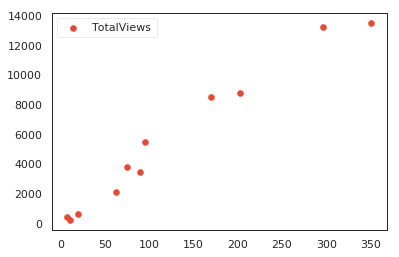

In [33]:
# Modify the graph above by assigning each species an individual color.
x=yourkernels["TotalVotes"]
y=yourkernels["TotalViews"]
plt.scatter(x, y)
plt.legend()
plt.show()


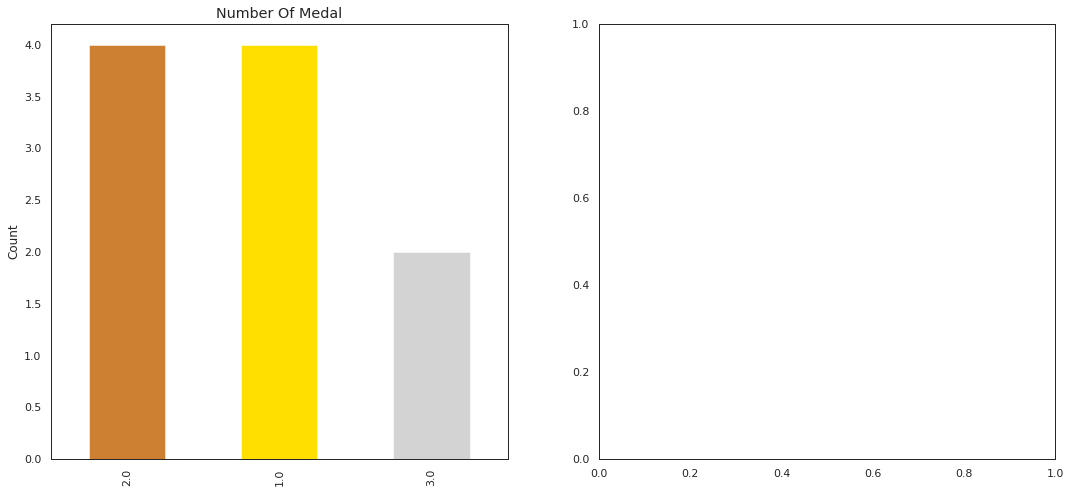

In [34]:
f,ax=plt.subplots(1,2,figsize=(18,8))
yourkernels['Medal'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Medal')
ax[0].set_ylabel('Count')
plt.show()

<a id="15"></a> <br>
### 3-4-2 Box
In descriptive statistics, a **box plot** or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.[wikipedia]

<Figure size 432x288 with 0 Axes>

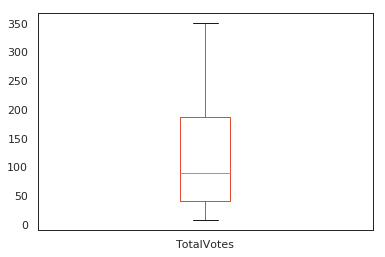

<Figure size 432x288 with 0 Axes>

In [35]:
yourkernels["TotalVotes"].plot(kind='box')
plt.figure()
#This gives us a much clearer idea of the distribution of the input attributes:



<Figure size 432x288 with 0 Axes>

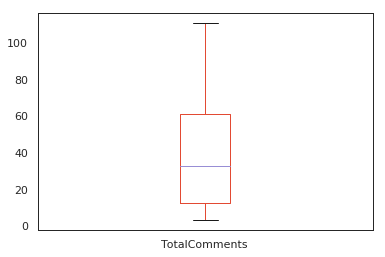

<Figure size 432x288 with 0 Axes>

In [36]:
yourkernels["TotalComments"].plot(kind='box')
plt.figure()


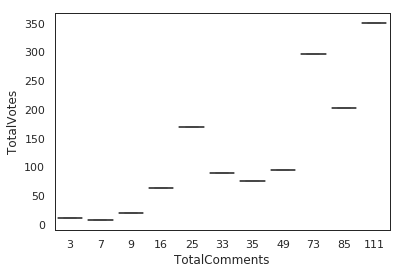

In [37]:
# To plot the species data using a box plot:

sns.boxplot(x="TotalComments", y="TotalVotes", data=yourkernels )
plt.show()

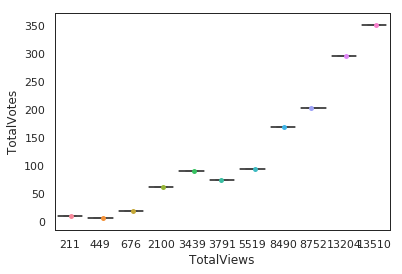

In [38]:
# Use Seaborn's striplot to add data points on top of the box plot 
# Insert jitter=True so that the data points remain scattered and not piled into a verticle line.
# Assign ax to each axis, so that each plot is ontop of the previous axis. 

ax= sns.boxplot(x="TotalViews", y="TotalVotes", data=yourkernels)
ax= sns.stripplot(x="TotalViews", y="TotalVotes", data=yourkernels, jitter=True, edgecolor="gray")
plt.show()

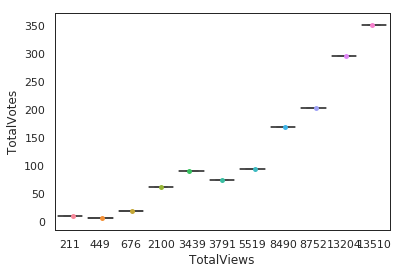

In [39]:
# Tweek the plot above to change fill and border color color using ax.artists.
# Assing ax.artists a variable name, and insert the box number into the corresponding brackets

ax= sns.boxplot(x="TotalViews", y="TotalVotes", data=yourkernels)
ax= sns.stripplot(x="TotalViews", y="TotalVotes", data=yourkernels, jitter=True, edgecolor="gray")

boxtwo = ax.artists[2]
boxtwo.set_facecolor('red')
boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('yellow')
boxthree.set_edgecolor('black')

plt.show()

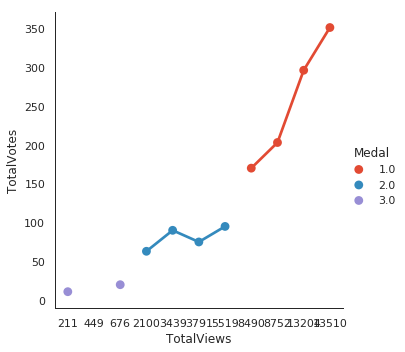

In [40]:
sns.factorplot('TotalViews','TotalVotes',hue='Medal',data=yourkernels)
plt.show()

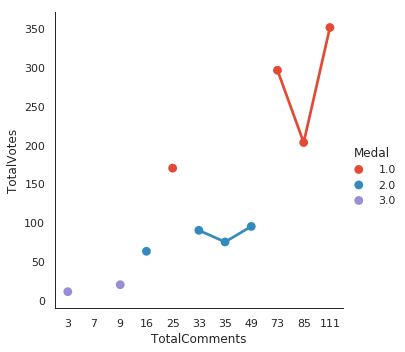

In [41]:
sns.factorplot('TotalComments','TotalVotes',hue='Medal',data=yourkernels)
plt.show()

<a id="16"></a> <br>
### 3-4-3 Histogram
We can also create a **histogram** of each input variable to get an idea of the distribution.



In [ ]:
# histograms
yourkernels.hist(figsize=(15,20))
plt.figure()

<Figure size 432x288 with 0 Axes>

It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.



In [ ]:
yourkernels["TotalViews"].hist();

In [ ]:
yourkernels["TotalComments"].hist();

In [ ]:
sns.factorplot('TotalViews','TotalVotes',data=yourkernels)
plt.show()

In [ ]:
sns.factorplot('TotalComments','TotalVotes',data=yourkernels)
plt.show()

<a id="17"></a> <br>
### 3-4-5 violinplots

In [ ]:
# violinplots on petal-length for each species
sns.violinplot(data=yourkernels,x="TotalViews", y="TotalVotes")

In [ ]:
# violinplots on petal-length for each species
sns.violinplot(data=yourkernels,x="TotalComments", y="TotalVotes")

In [ ]:
sns.violinplot(data=yourkernels,x="Medal", y="TotalVotes")

In [ ]:
sns.violinplot(data=yourkernels,x="Medal", y="TotalComments")

how many NA elements in every column


<a id="18"></a> <br>
###  3-6-7 kdeplot

In [ ]:
# seaborn's kdeplot, plots univariate or bivariate density estimates.
#Size can be changed by tweeking the value used
sns.FacetGrid(yourkernels, hue="Medal", size=5).map(sns.kdeplot, "TotalComments").add_legend()
plt.show()

In [ ]:
sns.FacetGrid(yourkernels, hue="Medal", size=5).map(sns.kdeplot, "TotalVotes").add_legend()
plt.show()

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(yourkernels[yourkernels['Medal']==1].TotalVotes,ax=ax[0])
ax[0].set_title('TotalVotes in Medal 1')
sns.distplot(yourkernels[yourkernels['Medal']==2].TotalVotes,ax=ax[1])
ax[1].set_title('TotalVotes in Medal 2')
sns.distplot(yourkernels[yourkernels['Medal']==3].TotalVotes,ax=ax[2])
ax[2].set_title('TotalVotes in Medal 3')
plt.show()

<a id="19"></a> <br>
### 3-4-8 jointplot

In [ ]:
# Use seaborn's jointplot to make a hexagonal bin plot
#Set desired size and ratio and choose a color.
sns.jointplot(x="TotalVotes", y="TotalViews", data=yourkernels, size=10,ratio=10, kind='hex',color='green')
plt.show()

<a id="20"></a> <br>
###  3-4-9 andrews_curves

In [ ]:
# we will use seaborn jointplot shows bivariate scatterplots and univariate histograms with Kernel density 
# estimation in the same figure
sns.jointplot(x="TotalVotes", y="TotalViews", data=yourkernels, size=6, kind='kde', color='#800000', space=0)

<a id="21"></a> <br>
### 3-4-10 Heatmap

In [ ]:
plt.figure(figsize=(10,7)) 
sns.heatmap(yourkernels.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

<a id="22"></a> <br>
## 3-4-11 WordCloud
Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called Tag Cloud or WordCloud.

In [ ]:
from wordcloud import WordCloud as wc
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))
messages.head(1)

In [ ]:
def generate_wordcloud(text): 
    wordcloud = wc(relative_scaling = 1.0,stopwords = eng_stopwords).generate(text)
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.margins(x=0, y=0)
    plt.show()

In [ ]:
text=','.join(str(v) for v in messages['Message'])
#text =" ".join(messages['Message'])
generate_wordcloud(text)

<a id="23"></a> <br>
# 5- conclusion
Exploratory data analysis (**EDA**) is an approach to analyzing data sets to summarize their main **characteristics**, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
This kernel it is not completed yet! Following up!
###### [Go to top](#top)

you can follow me on:

> ###### [ GitHub](https://github.com/mjbahmani/10-steps-to-become-a-data-scientist)

--------------------------------------

 **I hope you find this kernel helpful and some <font color="red"><b>UPVOTES</b></font> would be very much appreciated** 

<a id="24"></a> <br>
# 6- References
1. [Coursera](https://www.coursera.org/specializations/data-science-python)
1. [GitHub](https://github.com/mjbahmani)
<br>
<br>
[Go to top](#top)

#### This kernel is not completed yet and will be updated soon  !!!